

*   Machine learning
*   Problem - Regression
*   Model - Linear Regression(Univarient) from scratch



In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')

df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [16]:
X = df.values[:, 0]  # get input values from first column
y = df.values[:, 1]  # get output values from second column
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

Total no of training examples (m) = 97 



In [17]:
X.shape, y.shape

((97,), (97,))

Text(0.5, 1.0, 'Scatter plot of training data')

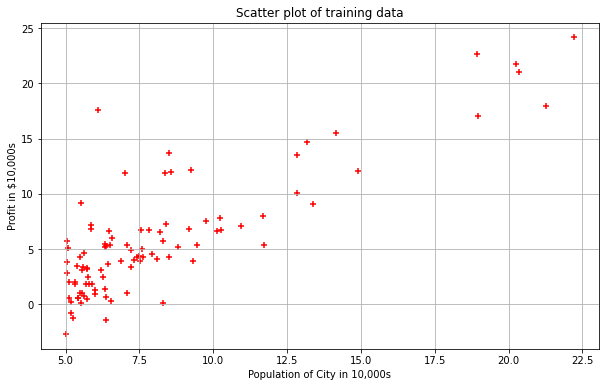

In [18]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

In [19]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)

X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))
X.shape

(97, 2)

In [9]:
def gradient_descent(X, y, theta, lr, iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta) 

    # Find error
    errors = np.subtract(predictions, y)

    # Calculate cost - MSE cost function
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    cost_history[i] = J

    # Gradient Descent
    sum_delta = (lr / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;

  return theta, cost_history

**Univerient Linear Regression - Straight Line equation**

y = theta0 + theta1 * X

We need to find best value of theta0 and theta1. 
For that we use optimizer - Gradient descent.

In [23]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(X.shape[1])
iterations = 1500;
lr = 0.01;

theta, cost_history = gradient_descent(X, y, theta, lr, iterations)
print('Final value of theta =', theta)

Final value of theta = [-3.63029144  1.16636235]


Text(0.5, 1.0, 'Convergence of gradient descent')

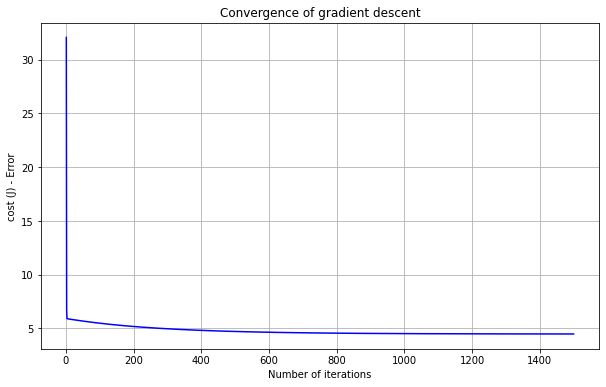

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J) - Error")
plt.title("Convergence of gradient descent")

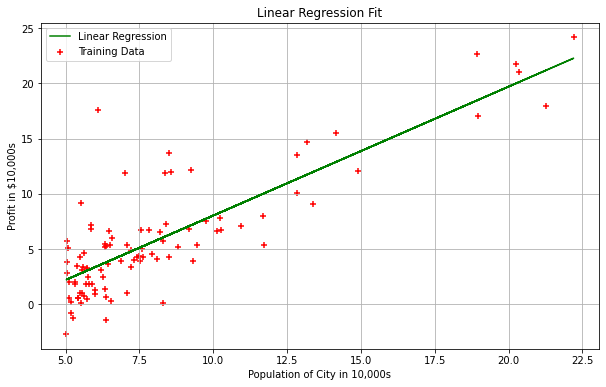

In [25]:
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

references - https://satishgunjal.com/univariate_lr/